In [23]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from IPython.display import clear_output

C:\Users\alimu\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [6]:
players = pd.read_csv("players_22.csv")

C:\Users\alimu\AppData\Local\Temp\ipykernel_16768\2061566770.py:1: DtypeWarning: Columns (25,108) have mixed types. Specify dtype option on import or set low_memory=False.
  players = pd.read_csv("players_22.csv")


In [10]:
players.head()

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,...,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,...,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,...,50+3,50+3,50+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png


In [9]:
players.describe()

,sofifa_id,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_team_id,league_level,...,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed
count,19239.000000,19239.000000,19239.000000,1.916500e+04,19178.000000,19239.000000,19239.000000,19239.000000,19178.000000,19178.000000,...,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,2132.000000
mean,231468.086959,65.772182,71.079370,2.850452e+06,9017.989363,25.210822,181.299704,74.943032,50580.498123,1.354364,...,57.929830,46.601746,48.045584,45.906700,16.406102,16.192474,16.055356,16.229274,16.491814,36.439962
std,27039.717497,6.880232,6.086213,7.613700e+06,19470.176724,4.748235,6.863179,7.069434,54401.868535,0.747865,...,12.159326,20.200807,21.232718,20.755683,17.574028,16.839528,16.564554,17.059779,17.884833,10.751563
min,41.000000,47.000000,49.000000,9.000000e+03,500.000000,16.000000,155.000000,49.000000,1.000000,1.000000,...,12.000000,4.000000,5.000000,5.000000,2.000000,2.000000,2.000000,2.000000,2.000000,15.000000
25%,214413.500000,61.000000,67.000000,4.750000e+05,1000.000000,21.000000,176.000000,70.000000,479.000000,1.000000,...,50.000000,29.000000,28.000000,25.000000,8.000000,8.000000,8.000000,8.000000,8.000000,27.000000
50%,236543.000000,66.000000,71.000000,9.750000e+05,3000.000000,25.000000,181.000000,75.000000,1938.000000,1.000000,...,59.000000,52.000000,56.000000,53.000000,11.000000,11.000000,11.000000,11.000000,11.000000,36.000000
75%,253532.500000,70.000000,75.000000,2.000000e+06,8000.000000,29.000000,186.000000,80.000000,111139.000000,1.000000,...,66.000000,63.000000,65.000000,63.000000,14.000000,14.000000,14.000000,14.000000,14.000000,45.000000
max,264640.000000,93.000000,95.000000,1.940000e+08,350000.000000,54.000000,206.000000,110.000000,115820.000000,5.000000,...,96.000000,93.000000,93.000000,92.000000,91.000000,92.000000,93.000000,92.000000,90.000000,65.000000


In [11]:
features = ["overall", "potential", "value_eur", "wage_eur", "age"]

In [12]:
players = players.dropna(subset=features) # dropping empty fields

In [13]:
data = players[features].copy()
data # this is the data/dataframe that we will work with

,overall,potential,value_eur,wage_eur,age
0,93,93,78000000.0,320000.0,34
1,92,92,119500000.0,270000.0,32
2,91,91,45000000.0,270000.0,36
3,91,91,129000000.0,270000.0,29
4,91,91,125500000.0,350000.0,30
...,...,...,...,...,...
19234,47,52,70000.0,1000.0,22
19235,47,59,110000.0,500.0,19
19236,47,55,100000.0,500.0,21
19237,47,60,110000.0,500.0,19


# Here's what we will be doing:
- Scale the data (max/min)
- Initializing Random Centroids
- Labelling each data point
- Creation of new Centroids
- Visualization
- Repeating 3-5 until the algorithm stops as centroid stops changing

In [14]:
data = ((data - data.min()) / (data.max() - data.min())) * 10 + 1

In [15]:
data.describe()

,overall,potential,value_eur,wage_eur,age
count,19165.000000,19165.000000,19165.000000,19165.000000,19165.000000
mean,5.078302,5.799998,1.146473,1.243826,4.403716
std,1.496262,1.323418,0.392477,0.557253,1.750932
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4.043478,4.913043,1.024022,1.014306,2.851852
50%,5.130435,5.782609,1.049796,1.071531,4.333333
75%,6.000000,6.652174,1.102634,1.214592,5.814815
max,11.000000,11.000000,11.000000,11.000000,11.000000


In [16]:
def random_centroids(data, k):  # initializing random Centroids using this function
    centroids = []
    for i in range(k):  # k is the number of segmnents/centroids we want from our dataset ie the number of clusters we want
        centroid = data.apply(lambda x: float(x.sample()))
        centroids.append(centroid)
    return pd.concat(centroids, axis=1) 

In [17]:
centroids = random_centroids(data, 5) 

In [18]:
centroids

,0,1,2,3,4
overall,2.521739,4.478261,3.826087,5.347826,3.391304
potential,4.043478,7.956522,7.304348,6.869565,4.260870
value_eur,1.013712,1.097479,2.159384,1.051085,1.026599
wage_eur,1.042918,1.615165,1.042918,1.643777,1.007153
age,7.666667,4.333333,2.851852,1.740741,2.111111


In [19]:
def get_labels(data, centroids):  # we get the labels from this function using distance formula from geometry
    distances = centroids.apply(lambda x: np.sqrt(((data - x) ** 2).sum(axis=1)))  # distance is a number that represents distance from each player to each cluster centroid
    return distances.idxmin(axis=1)

In [20]:
labels = get_labels(data, centroids)

In [21]:
labels.value_counts()
# cluster 1 has 6898 players...

1    6898
4    4778
0    3254
3    2851
2    1384
dtype: int64

In [24]:
def new_centroids(data, labels, k):
    centroids = data.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T  # one group per cluster is created and then we apply geometric mean formula to each of those
    return centroids

In [25]:
def plot_clusters(data, labels, centroids, iteration): # visualization to imporove the experience and keep track
    pca = PCA(n_components=2)  # initializing a PCA (Principal Component Analysis) object to reduce the data to 2 dimensions
    data_2d = pca.fit_transform(data)
    centroids_2d = pca.transform(centroids.T)  # transforming the centroids into the same 2D space using the PCA model fitted on the data, storing the result in centroids_2d
    clear_output(wait=True)
    plt.title(f'Iteration {iteration}')
    plt.scatter(x=data_2d[:,0], y=data_2d[:,1], c=labels)  # creating a scatter plot of the data points in 2D space, coloring them according to their cluster labels.
    plt.scatter(x=centroids_2d[:,0], y=centroids_2d[:,1])  # creating a scatter plot of the centroids in 2D space.
    plt.show()

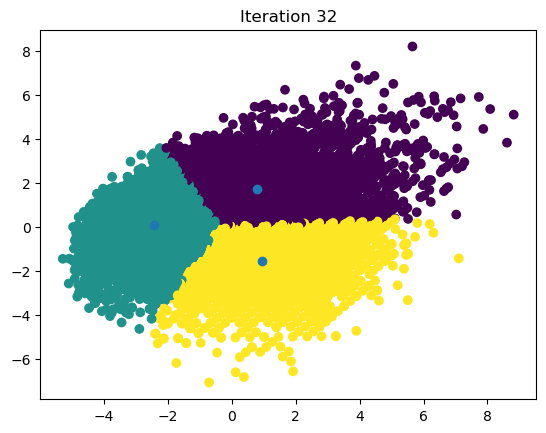

In [26]:
max_iterations = 200
centroid_count = 3

centroids = random_centroids(data, centroid_count)
old_centroids = pd.DataFrame()
iteration = 1

while iteration < max_iterations and not centroids.equals(old_centroids):  # while loop iteratively updates centroids and cluster labels, visualizing the clusters each time, until the centroids stabilize or the maximum number of iterations is reached.
    old_centroids = centroids
    
    labels = get_labels(data, centroids)
    centroids = new_centroids(data, labels, centroid_count)
    plot_clusters(data, labels, centroids, iteration)
    iteration += 1

# stopped at iteration 32 in this case. Can differ for you due to randomization.

In [27]:
centroids # see what each centroid represents now -- which cluster makes the most money...etc

,0,1,2
overall,6.324628,3.436536,5.200636
potential,7.100439,5.357557,4.894208
value_eur,1.311183,1.029343,1.049892
wage_eur,1.456630,1.031374,1.130961
age,3.874397,2.674807,5.963956


In [31]:
players[labels==0][["short_name"] + features] # players from cluster 0 above
# make the most moeny, highest potentials, highest overall performance, not the youngest though etc basically your star players

,short_name,overall,potential,value_eur,wage_eur,age
0,L. Messi,93,93,78000000.0,320000.0,34
1,R. Lewandowski,92,92,119500000.0,270000.0,32
2,Cristiano Ronaldo,91,91,45000000.0,270000.0,36
3,Neymar Jr,91,91,129000000.0,270000.0,29
4,K. De Bruyne,91,91,125500000.0,350000.0,30
...,...,...,...,...,...,...
13267,K. Nagera,63,80,1300000.0,8000.0,19
13351,Llabrés,63,81,1200000.0,3000.0,19
14026,M. Azeez,62,83,1300000.0,4000.0,18
14144,H. Mejbri,62,84,1300000.0,6000.0,18
